This is my first approach with the transactions data set, doing a simple analysis.

In [23]:
import pandas as pd
import seaborn as sns

In [24]:
#I did this notebook on colab
tran_csv = pd.read_csv("transactions.csv", sep="|")

In [25]:
#look some items
tran_csv.head()


,sessionID,itemID,click,basket,order
0,0,21310,1,0,0
1,1,73018,1,0,0
2,2,19194,1,0,0
3,3,40250,1,0,0
4,4,46107,1,0,0


In [26]:
#We have 365143 rows
tran_csv.shape

(365143, 5)

In [27]:
#Check null values
columns=tran_csv.columns
for column in columns:
  print("NA in",column,tran_csv[column].isnull().any())

NA in sessionID False
NA in itemID False
NA in click False
NA in basket False
NA in order False


In [28]:
#Seems no null values, do first swipe
tran_csv.describe()

,sessionID,itemID,click,basket,order
count,365143.000000,365143.000000,365143.000000,365143.000000,365143.000000
mean,139586.939175,40051.292307,1.233180,0.141202,0.048403
std,80795.207871,22493.347334,1.069996,1.107574,0.268717
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,69459.500000,20713.000000,1.000000,0.000000,0.000000
50%,139608.000000,40692.000000,1.000000,0.000000,0.000000
75%,209750.500000,58916.000000,1.000000,0.000000,0.000000
max,279354.000000,79066.000000,118.000000,293.000000,28.000000


It is interesting to see that it seems that we do not have a lot of basket and orders, means are very low. Also, max values are 293 and 28 respectively

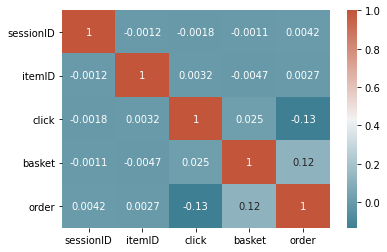

In [29]:
# Let's see some correlation
corr = tran_csv.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Well, this seems that we do not have a lot of correlation between the variables, they are quite independent from each other. I am going to compare clicks, basket and orders with the itemID in scatter plots to try to find some extra stuff.

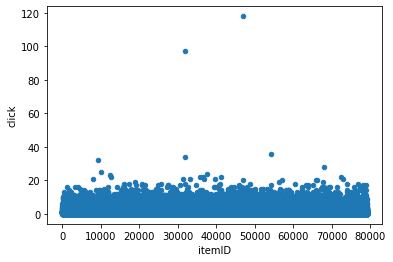

In [30]:
tran_csv.plot(kind='scatter', x='itemID', y='click')

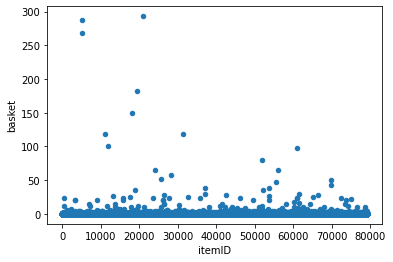

In [31]:
tran_csv.plot(kind='scatter', x='itemID', y='basket')

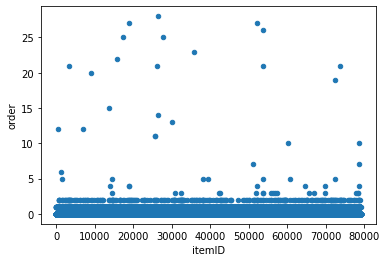

In [32]:
tran_csv.plot(kind='scatter', x='itemID', y='order')

Now I need to discuss these findings to see how are we going to approach this data. The scary thing is that some items have not been clicked/basket/ordered at all.

Time to do the dictionaries and the scores

In [33]:
dict_transactions={}
itemIDs=pd.unique(tran_csv["itemID"])
sessions=pd.unique(tran_csv["sessionID"])
for item in itemIDs:
  dict_transactions[item]=[]  

In [34]:
for session in sessions:
  list_of_books=tran_csv[tran_csv.sessionID==session]["itemID"].values.tolist()
  for book1 in list_of_books:
    for book2 in list_of_books:
      if(book1==book2):
        continue
      aux_list=dict_transactions[book1]
      if(book2) not in aux_list:
        aux_list.append(book2)
      new_entry={book1:aux_list}
      dict_transactions.update(new_entry)


In [35]:
dict_transactions

{21310: [],
 73018: [14526,
  53120,
  31528,
  66430,
  30592,
  63730,
  76459,
  27488,
  18805,
  24075,
  64957,
  62170,
  39807,
  44161,
  69185,
  27720,
  47678,
  48423,
  19070,
  25451,
  28674,
  37374,
  20354,
  31995,
  45799,
  38034,
  24011,
  65959,
  16047,
  77471,
  76563,
  40044,
  17783,
  65651,
  78841,
  13711,
  63373,
  36703,
  49376,
  43911,
  886,
  63706,
  65802,
  55216,
  57469,
  67016,
  44220,
  40692,
  43087,
  31921,
  61619,
  20516,
  20455,
  1142,
  36071,
  62962,
  42374,
  55875,
  24766,
  55010],
 19194: [8643,
  61593,
  9196,
  68724,
  40399,
  51891,
  35750,
  50997,
  71050,
  29717,
  17727,
  46998,
  37338,
  1878,
  1122,
  7047,
  74947,
  27399,
  55190,
  369,
  75127,
  29396,
  36243,
  30414,
  67860,
  38135,
  74398,
  36071,
  14767,
  14189,
  37237,
  51634,
  40289,
  35495,
  49005,
  66814,
  9175,
  4030,
  35267,
  11743,
  16335,
  59360,
  17327,
  76769,
  70183,
  44815,
  77799,
  2253,
  35857,
  715

In [37]:
tran_csv_compressed=tran_csv.groupby(["itemID"]).sum().drop(["sessionID"], axis=1)
tran_csv_compressed.tail()

,click,basket,order
itemID,,,
79057,12,1,0
79058,7,0,0
79059,1,0,0
79062,15,3,0
79066,6,1,1
